# Earthquake Cluster Analysis: K-means approach

This notebook is modified from
https://github.com/Saralkarki/kmean_clustering/blob/master/Earthquake%20Clustering%20with%20KMeans.ipynb

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd

%matplotlib inline

### Introduction
        
An earthquake is the shaking on the surface of the Earth, resulting from the sudden release of energy in the Earth’s lithosphere that creates seismic waves. Earthquakes can range in size from those that are so weak that they cannot be felt to violent ones that can cause serious damage to entire cities. The seismicity or seismic activity of an area refers to the frequency, type and size of earthquakes experienced over a period of time.
       

Depending on the magnitude scale  of an earthquake they can be categorized as$^1$

| Class	|Magnitude |
|:-------|:----------:|
|Great	|8 or more|
|Major	|7 - 7.9|
|Strong	|6 - 6.9|
|Moderate|5 - 5.9|
|Light|	4 - 4.9|
|Minor|	3 -3.9|

                         

Nepal is one of the most seismically active regions in the world. The quakes in Nepal are a manifestation of the ongoing convergence between the Indo-Australian and Asian tectonic plates that has progressively built the Himalayas over the last 50 million years.$^2$

From 1994 to 2016, there have been over 900 significant tremors in Nepal. In the year 2015 alone there was well over 400 significant tremors in Nepal. The tremor in 2015 were mostly aftershocks after the 7.8 Magnitude earthquake with is epicenter at Gorkha struck Nepal. According to the United States Geological Survey(USGS)the April 25th earthquake in Nepal was registered at 7.8 Magnitude.$^3$


Many researchers have carried out the research for the study and analysis of earthquake clusters. Additionally, K-means clustering has been proposed to make the partition of earthquake source zones$^6$$^,$$^7$.  Pepi Novianti, Dyah Setyorini , Ulfasari Rafflesia in their paper 'K-Means cluster analysis in earthquake epicenter clustering' talk in great detail about the use of K-means algorithm for earthquake clustering.$^8$ Furthermore, Kamat and Kamath have also used K-means algorithm for their paper "Earthquake cluster analysis'. They have also discussed in great detail about the use of the algorithm.$^9$

 In this paper, I try to amalgamate and replicate the two papers above mentioned with earthquake dataset from Nepal. The dataset was extracted from the National Seismology Department of Nepal. Additionally, apart from using the K-means algorithm for clustering, the dataset has also been clustered for every ten years beginning from 1994 to 2019.

The dataset contains over 900 datapoints, however, the as a part of the study only earthquakes categorised moderate or stronger are taken into consideration for this clustering study. Therefore, we are looking at 125 earthquakes categeorized at least as moderate earthquake from June 25,1994 to May 11,2019. The dataset was extracted from the [National Seismological Center](http://seismonepal.gov.np/earthquakes).

In [2]:
#import the required dataset
df_full = pd.read_csv("earthquake.csv")

print(df_full.head)

df_full = df_full.drop(['Unnamed: 0','index'],axis = 1)
df_full['DateTime'] = pd.to_datetime(df_full['DateTime'],  errors='coerce')
# only keeping the columns we require
df = df_full[['Lat','Long','Magnitude']]
df_year = df_full[['Lat','Long','Magnitude','DateTime']]
# only keeping earthquake categorized as moderate
df = df[df.Magnitude >= 5]
df_year = df_year[df_year.Magnitude >= 5]
len(df_year),len(df)

<bound method NDFrame.head of      Unnamed: 0  index    Lat   Long  Magnitude       Epicenter  \
0             0      9  27.75  86.16        5.1         Dolakha   
1             1      8  29.37  81.52        5.5          Bajura   
2             3      6  28.34  87.35        4.8   Sankhuwasabha   
3             4      5  29.00  82.26        4.6        Jajarkot   
4             5      4  28.92  82.00        4.7        Jajarkot   
..          ...    ...    ...    ...        ...             ...   
928         960    952  27.69  85.17        5.2         Dhading   
929         961    951  27.70  85.14        4.3         Dhading   
930         962    950  27.93  85.94        4.0  Sindhupalchowk   
931         963    949  27.94  85.72        4.0  Sindhupalchowk   
932         964    948  28.98  81.78        5.1         Dailekh   

                DateTime  
0    1994-06-25 05:45:00  
1    1994-07-17 11:00:00  
2    1994-09-25 11:00:00  
3    1994-10-22 11:00:00  
4    1994-10-24 11:00:00  
.. 

(125, 125)

### K-Means Cluster Analysis

Cluster analysis is a multivariate method that searches for patterns in a data set by grouping the observations into clusters. The goal of this method is to find an optimal grouping for which the observations or objects within each cluster are similar (homogeneous). However the clusters are dissimilar to each other (heterogeneous). (*Novianti et al. 2011,pg. 82*).  We clustered seismic events based on their geographical location and magnitude.

K-means clustering is a type of unsupervised learning, which means that it is used when we have unlabeled data. The algorithm works iteratively to find groups(clusters) in the data, and the number of the groups is represented by variable K. We use the euclidian distance to find the distance between the datapoints and centroids, and it is with this distance we can sort the data points into clusters. The euclidian distance can be calculated as:

Between two points.

if p = (p$_1$, p$_2$) and q = (q$_1$, q$_2$) then the distance is given by

d(p,q) = $\sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}$ or $\sqrt {\sum\limits_{n}^{i = 1}(x_i - y_i)^2}$

similarly, for three dimension the formula is,

d(p,q) = $\sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + (q_3 - p_3)^2}$


#### Steps for K-means clustering:

 1. Decide on the number of clusters(K) for the dataset and choose k random points in the dataset. These k random points are called centroids and they should be equal to the number of clusters.

 2. Calculate the Euclidean distance between each data point and chosen clusters centroids. A point is considered to be in a particular cluster when the Euclidean distance is minimum.

 3. Define new centroids for each cluster by taking the mean of all points assigned to the cluster.

 4. Iterate over steps 2 and 3 until the positions of centroids no longer change and the cluster assignment remains the same.





### Optimal value of K

In an unlabelled dataset finding the optimal value of K is challenge. In this case too, the number of clusters required is not certain. Therefore, we used a heuristic approach with  **Elbow Method** to identify the optimal  value for K.

We identified the the value for K using the scikit learn package. We plot the sum of squared distance upon running kmeans for various values of K. In the plot we can see a clear Elbow like hinge and we take that point as the optimal value for K. According, to our plot we pick K = 2.

There are limitations of using the elbow method as it is an heuristic approach.

In [3]:
#Finding the optimal K using the elbow method
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

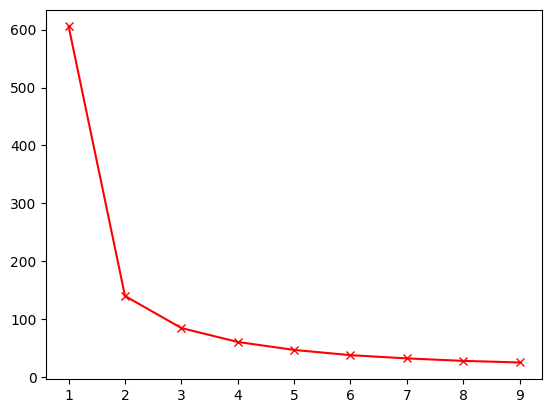

In [4]:
plt.plot(K, Sum_of_squared_distances, 'rx-')

Finally using the kmeans alogrithm from the scikit library to differentiate the two clusters.

In [5]:
kmeans = KMeans(n_clusters=2).fit(df)
df['Clusters'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
map_1 = gpd.read_file('NPL_adm3.shp')
print(map_1.head)

<bound method NDFrame.head of     ID_0  ISO NAME_0  ID_1   NAME_1  ID_2       NAME_2  ID_3        NAME_3  \
0    157  NPL  Nepal     0     None     8  Dhaualagiri    60       Baglung   
1    157  NPL  Nepal     0     None     8  Dhaualagiri    61       Mustang   
2    157  NPL  Nepal     0     None     8  Dhaualagiri    62        Myagdi   
3    157  NPL  Nepal     0     None     8  Dhaualagiri    63        Parbat   
4    157  NPL  Nepal     1  Central     1      Bagmati     1     Bhaktapur   
..   ...  ...    ...   ...      ...   ...          ...   ...           ...   
70   157  NPL  Nepal     5     West    14      Lumbini    70  Arghakhanchi   
71   157  NPL  Nepal     5     West    14      Lumbini    71         Gulmi   
72   157  NPL  Nepal     5     West    14      Lumbini    73   Nawalparasi   
73   157  NPL  Nepal     5     West    14      Lumbini    74         Palpa   
74   157  NPL  Nepal     5     West    14      Lumbini    75     Rupandehi   

   NL_NAME_3                     

In [7]:
# Find the centroid location
centroid_1, centroid_2 = kmeans.cluster_centers_
centroid_1 = np.delete(centroid_1,2)
centroid_2 = np.delete(centroid_2,2)

# Result and Discussion

Using the optimal number (K) as suggested by the elbow method we were able to group the earthquakes from the dataset into two different clusters. The number or earthquakes with magnitude of 5 or higher is considerably higher on the red cluster. A total of 92 earthquakes make up the red clusters, and 33 earthquakes make up the blue cluster. The central region of Nepal looks to have been mostly affected by the earthquake in these 25 years. The April 2015 earthquake and its aftershocks explains why we have such a cluster in the central region. A total of 52 earthquakes with magnitude of 5 or more took place in 2015 alone.

The map also shows the centroid epicenters in yellow for the two clusters. The clusters were generated by calculating the euclidian distance between the centroids and the data points.

One interesting observation in the map was that the epicenters of the earthquakes were either in the hilly or the mountainous region of Nepal. Going back to the origin of hills and mountains of Nepal which were due to massive earthquakes this does explain why the epicenters are predominantly in the mountainous regions.

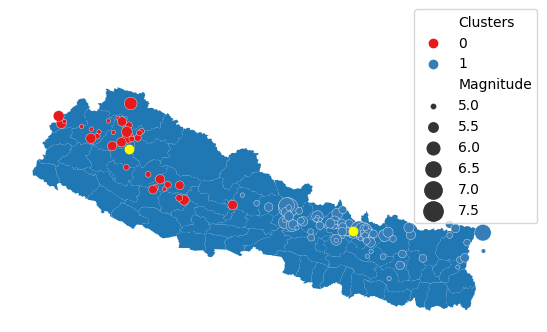

In [8]:
map_1.plot(column = 'NAME_0')
sns.scatterplot(x=df.Long, y=df.Lat, hue = df.Clusters ,palette='Set1',
                size=df.Magnitude, sizes=(10,200),
                    legend = 'brief')
plt.legend(loc=2, bbox_to_anchor=(0.80, 1.30))

plt.scatter(centroid_1[1],centroid_1[0],color="yellow")
plt.scatter(centroid_2[1],centroid_2[0],color="yellow")
plt.axis('off')
plt.savefig("earthquake_clusters_2.png", dpi=200)

#### References:

1.  http://www.geo.mtu.edu/UPSeis/magnitude.html

2. https://viewsweek.com/why-nepal-is-so-prone-to-earthquakes/

3. https://earthquake.usgs.gov/earthquakes/eventpage/us20002926/executive

4. I.A. Musdar and Azhari. “RCE-Kmeans method for Data Clustering”. International Journal of Advances in Intelligent Informatics,Vol 1, No 2, pp. 107-114, 2015.

5. Witold Dzwinel, David A.Yuen, Krzysztof Boryczko, Yehuda Ben-Zion, Shoichi Yoshioka, Takeo Ito, Cluster Analysis, Data-Mining, Multi-dimensional Visualization of Earthquakes over Space, Time and Feature Space, 2016.
6. G. Weatherill and P.W. Burton. “Delineation of Shallow Seismic Source Zones Using k-means Cluster Analysis. with Application to the Aegean Region”. Geophysical Journal International, Vol. 176, pp 565-588. 2009.

7. K. Rehman, P.W. Burton, and G.A. Weatherill. “K-Means Cluster Analysis and Seismicity Partitioning for Pakistan”. Journal of Seismology, Vol.18, pp. 401-419, 2014.
8. Novianti P, Setyorini D and Rafflesia U, "K-Means cluster analysis in earthquake epicenter clustering",International Journal of Advances in Intelligent Informatics,Vol. 3, No. 2, pp. 81-89,July 2017
9. Kamat R.K. and Kamath R.S.,"Earthquake Cluster Analysis: K-Means Approach",Journal of Chemical and Pharmaceutical Sciences,Vol.10, Issue 1, pp.250-253,March 2017


                                      